# Problem Statement

Electronics Mart, a leading global electronics retailer, has experienced a significant downturn in sales, with a nearly 50% decline in revenue in 2020 compared to the previous year.


We have 3 different data sets to check out before diving to the analysis.

Initially importing the required libraries required for the analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data sets from the excel files

In [2]:
customers = pd.read_csv('Customers.csv', encoding='latin1')
products = pd.read_csv('Products.csv', encoding='latin1')
sales = pd.read_csv('Sales.csv', encoding='latin1')

# Exploring Customers Table

In [3]:
customers.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [4]:
customers.nunique()

CustomerKey    15266
Gender             2
Name           15118
City            8258
State Code       467
State            512
Zip Code        9505
Country            8
Continent          3
Birthday       11270
dtype: int64

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


The dataset consists of 15,266 entries and 10 columns. Here is a brief overview of each column:



- **CustomerKey**: This integer data type serves as the unique identifier for customers registered with the Mart.
- **Gender**: This column indicates the gender of the customer.
- **Name**: We store the full name of the customer.
- **City**: Contains information about the city where the customer is assumed to reside.
- **State Code and State**: This object data provides information about the state and its respective code.
- **Zip Code**: A unique code in object data type used for shipping purposes.
- **Country**: Provides information about the customer's country.
- **Continent**: Indicates the continent corresponding to the customer's country.
- **Birthday**: Stores the birthdate of the customer.




# Handling the Missing values in Customer Table  

In [6]:
customers.isna().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

From the above we can see that we have 10 missing values in State Code column . We will try to impute it by observing the data.

In [7]:
customers[customers['State Code'].isna()]

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
5304,729681,Female,Rossana Padovesi,Polvica,NaN,Napoli,80035,Italy,Europe,4/18/1981
5316,732289,Male,Indro Piccio,Varcaturo,NaN,Napoli,80014,Italy,Europe,2/24/1949
5372,742042,Male,Amaranto Loggia,Casaferro,NaN,Napoli,80034,Italy,Europe,3/14/1936
5377,742886,Female,Edmonda Capon,Terzigno,NaN,Napoli,80040,Italy,Europe,8/6/1963
5378,743343,Female,Ambra Sagese,Pomigliano D'Arco,NaN,Napoli,80038,Italy,Europe,1/5/1961
5485,759705,Male,Callisto Lo Duca,Casilli,NaN,Napoli,80047,Italy,Europe,8/28/1976
5525,765589,Male,Michelino Lucchesi,Pompei Scavi,NaN,Napoli,80045,Italy,Europe,11/13/1947
5531,766410,Male,Adelmio Beneventi,Licola,NaN,Napoli,80078,Italy,Europe,1/13/1940
5631,781667,Female,Ilda Manna,Napoli,NaN,Napoli,80134,Italy,Europe,5/8/1977
5695,789177,Male,Calogero Folliero,Mariglianella,NaN,Napoli,80030,Italy,Europe,3/3/2000


In [8]:
customers[customers['Country']=='Italy']

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
5116,700308,Female,Nicoletta Angelo,Natile,RC,Reggio Calabria,89030,Italy,Europe,12/18/1946
5117,700309,Male,Filippo Trevisani,Pietrelcina,BN,Benevento,82020,Italy,Europe,10/1/1995
5118,700354,Female,Elga Sagese,Rettorgole,VI,Vicenza,36030,Italy,Europe,11/17/1957
5119,700619,Male,Flaviano Castiglione,Brazzolo,FE,Ferrara,44035,Italy,Europe,2/28/1945
5120,700909,Male,Davide Siciliani,Tamara,FE,Ferrara,44030,Italy,Europe,1/18/1943
...,...,...,...,...,...,...,...,...,...,...
5756,799323,Male,Domenico Fiorentino,Circello,BN,Benevento,82020,Italy,Europe,8/6/1946
5757,799366,Male,Berardo Onio,San Biagio In Padule,MO,Modena,41038,Italy,Europe,10/21/1944
5758,799620,Female,Ilda Ricci,Bagno Di Gavorrano,GR,Grosseto,58021,Italy,Europe,8/12/1936
5759,799689,Male,Francesco Sabbatini,Savoniero,MO,Modena,41046,Italy,Europe,3/25/1944


By observing the state codes of Italy we can see that generally a state with single word has the 1st two letters as the state code .So we can impute the missing values for the state of Napoli in similar fashion.

In [9]:
customers['State Code'].fillna('NA', inplace=True)
customers.isna().sum()

CustomerKey    0
Gender         0
Name           0
City           0
State Code     0
State          0
Zip Code       0
Country        0
Continent      0
Birthday       0
dtype: int64

We have about 15266 customer details. We have fixed the  missing information or null values in this table.

Now that we've dealt with the missing values in the dataset, we can proceed to examine the demographics of the customers and their distribution across categories.

# Visualizing Customer Insights

<Axes: ylabel='Gender'>

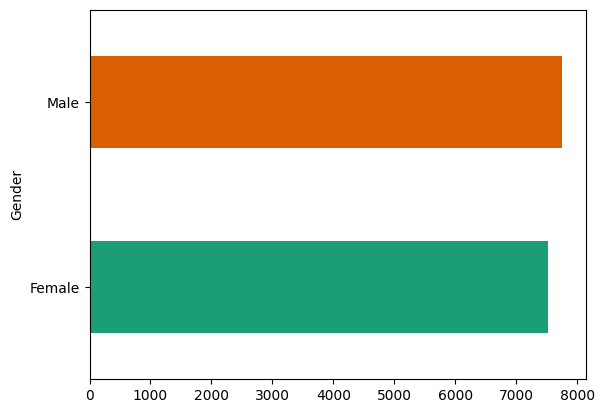

In [10]:
# @title Customer segmentation by Gender
customers.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

The no.of Male and Female customers are almost equal. We can say that Male customers are marginally more.

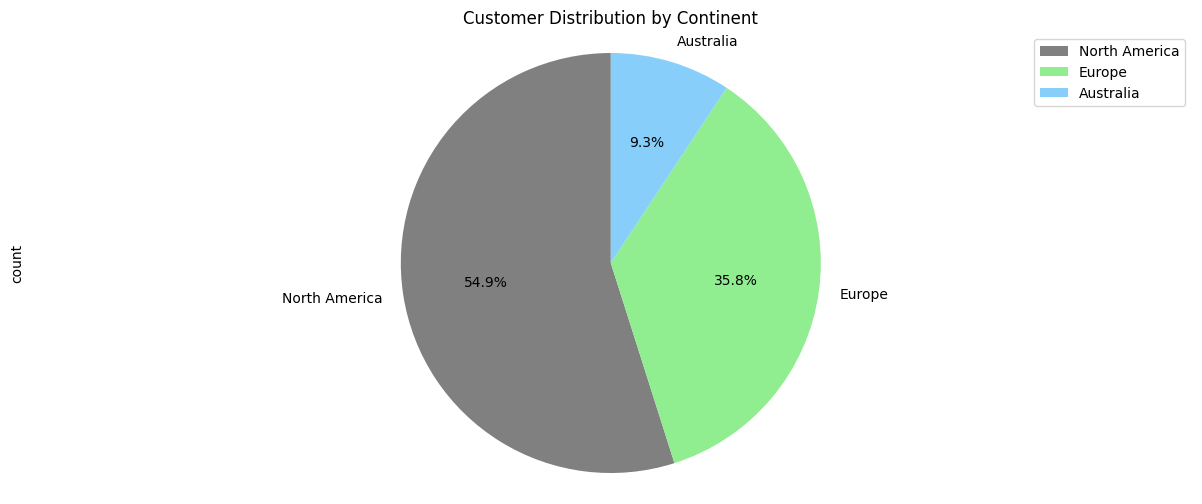

In [11]:
# @title Customer Distribution by Continent

plt.figure(figsize=(8, 6))
colors_list = ['grey', 'lightgreen', 'lightskyblue']
customers['Continent'].value_counts().plot(kind='pie', figsize=(15, 6), autopct='%1.1f%%', startangle=90, rot=None, colors=colors_list)
plt.title('Customer Distribution by Continent')
plt.axis('equal')
plt.legend(labels=customers['Continent'].value_counts().index, loc='upper right')
plt.show()


<Axes: xlabel='Country'>

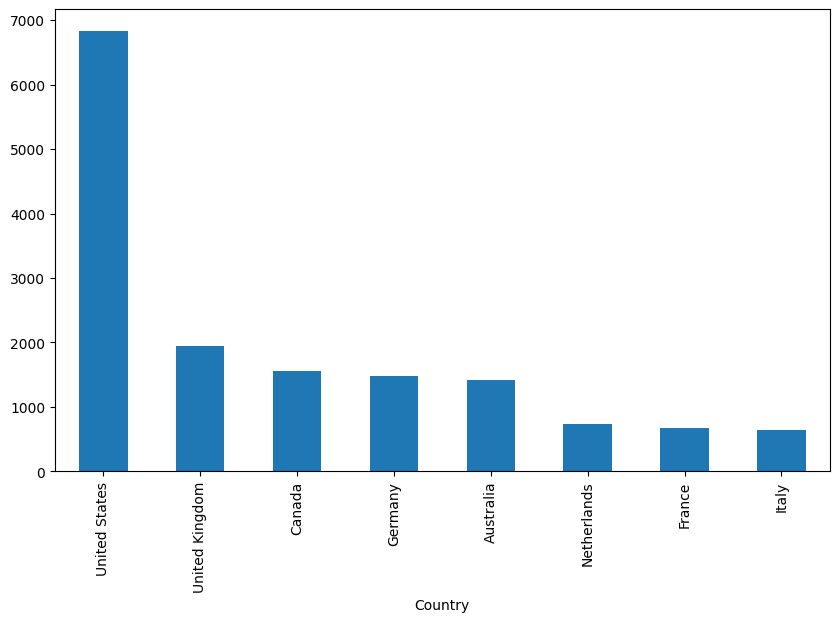

In [12]:
# @title Customer distribution across Countries
plt.figure(figsize=(10,6))
customers['Country'].value_counts().head(10).plot(kind='bar')

* From the above graphs we can clearly say that the customer base in US is significantly large when compared to the other countries.
* We can also see that Uk has 1944 and Canada has 1553 , ranked as 2nd and 3rd in terms of customers.
* Electronics mart is expanding their business in the diffrenet countries, attracting customers from different communities .

In [13]:
from datetime import datetime
customers['Age'] = round((datetime.now() - pd.to_datetime(customers['Birthday'])).dt.days / 365)
customers.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,Age
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939,85.0
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979,45.0
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947,77.0
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957,67.0
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965,59.0


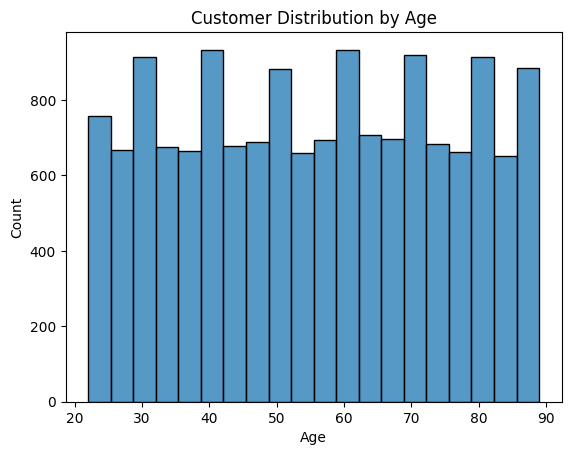

In [14]:
# @title Age Distribution
sns.histplot(data=customers['Age'],bins=20)
plt.title('Customer Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

* The age data is divided into categories, indicating the number of customers within various age ranges. Although interpreting these groups can be challenging without additional context, it is evident that Electronics Mart appeals to customers across all ages, addressing a diverse array of needs and preferences.

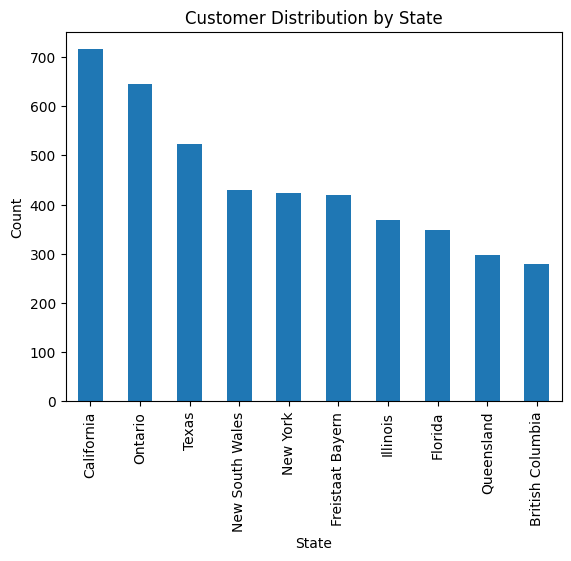

In [15]:
# @title Customer Distribution by states

customers['State'].value_counts().head(10).plot(kind='bar')
plt.title('Customer Distribution by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

* The states with the highest number of customers are California (715), Ontario (644), and Texas (522). This indicates that these regions are significant hubs for Electronics Mart's customer base.

# Exploring Products Table

Lets explore as what kind of electronics products are sold by the Retailer.

In [16]:
products.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


In [17]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [18]:
products['Product Name Without Color'] = products['Product Name'].apply(lambda x: ' '.join(x.split()[:-1]))

In [19]:
products['Unit Cost USD']=products['Unit Cost USD'].str.replace(',', '').str.replace('$', '').astype(float)
products['Unit Price USD']=products['Unit Price USD'].str.replace(',', '').str.replace('$', '').astype(float)

In [20]:
products.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Product Name Without Color
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio,Contoso 512MB MP3 Player E51
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio,Contoso 512MB MP3 Player E51
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio,Contoso 1G MP3 Player E100
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio,Contoso 2G MP3 Player E200
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio,Contoso 2G MP3 Player E200


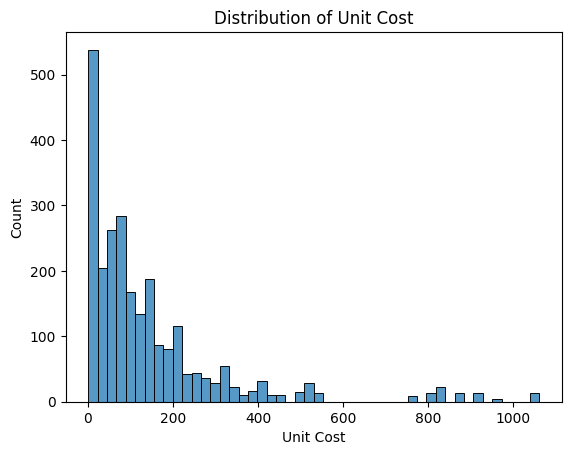

In [21]:
# @title Distribution of Unit Cost
sns.histplot(products['Unit Cost USD'])
plt.title('Distribution of Unit Cost')
plt.xlabel('Unit Cost')
plt.ylabel('Count')
plt.show()

* Unit cost of most of the products are in the range of \$0  to \$200
* There are very few products with price more than $200


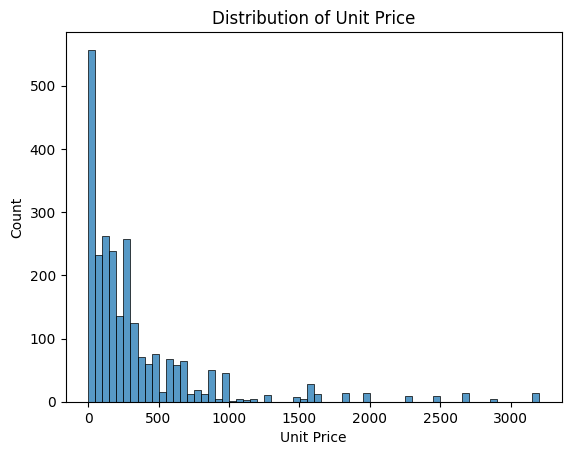

In [22]:
# @title Distribution of Unit Price
sns.histplot(products['Unit Price USD'])
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Count')
plt.show()

* Most of the products are in the unit price range of 0 - 1000
* Very few products are present having price > 1000

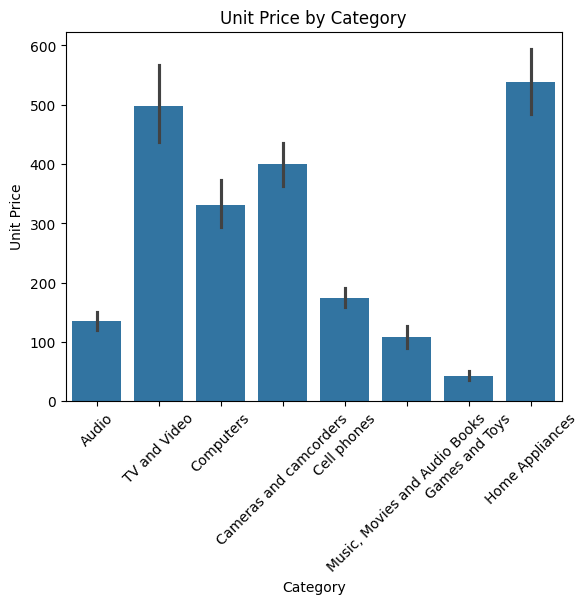

In [23]:
# @title Unit Price by Category
sns.barplot(x='Category', y='Unit Price USD', data=products)
plt.tick_params(axis='x', rotation=45)
plt.title('Unit Price by Category')
plt.xlabel('Category')
plt.ylabel('Unit Price')
plt.show()

In [24]:
products['Category'].unique()

array(['Audio', 'TV and Video', 'Computers', 'Cameras and camcorders',
       'Cell phones', 'Music, Movies and Audio Books', 'Games and Toys',
       'Home Appliances'], dtype=object)

In [25]:
products['Subcategory'].unique()

array(['MP4&MP3', 'Recording Pen', 'Bluetooth Headphones', 'Televisions',
       'VCD & DVD', 'Home Theater System', 'Car Video', 'Laptops',
       'Desktops', 'Monitors', 'Projectors & Screens',
       'Printers, Scanners & Fax', 'Computers Accessories',
       'Digital Cameras', 'Digital SLR Cameras', 'Camcorders',
       'Cameras & Camcorders Accessories', 'Home & Office Phones',
       'Touch Screen Phones', 'Smart phones & PDAs', 'Movie DVD',
       'Boxed Games', 'Download Games', 'Washers & Dryers',
       'Refrigerators', 'Microwaves', 'Water Heaters', 'Coffee Machines',
       'Lamps', 'Air Conditioners', 'Fans', 'Cell phones Accessories'],
      dtype=object)

In [26]:
products.isna().sum()

ProductKey                    0
Product Name                  0
Brand                         0
Color                         0
Unit Cost USD                 0
Unit Price USD                0
SubcategoryKey                0
Subcategory                   0
CategoryKey                   0
Category                      0
Product Name Without Color    0
dtype: int64

In [27]:
products.nunique()

ProductKey                    2517
Product Name                  2517
Brand                           11
Color                           16
Unit Cost USD                  480
Unit Price USD                 426
SubcategoryKey                  32
Subcategory                     32
CategoryKey                      8
Category                         8
Product Name Without Color     891
dtype: int64

In products we have a total of 891 unique products spread across 8 categories and 32 subcategories

- **ProductKey**: A unique identifier assigned to the product along with its color.
- **Product Name**: An object data type indicating the name of the product along with its color.
- **Brand**: Provides details about the brand that manufactured the product.
- **Color**: Information about the color of the product.
- **Unit Cost USD**: Contains cost information for each unit of the product in USD.
- **SubcategoryKey**: A unique identifier for each subcategory.
- **Subcategory**: The name of the subcategory.
- **CategoryKey**: Unique identifier for each category.
- **Category**: The name of the category.

# Exploaring Sales Table

Lets have a look at the sales data provided

In [28]:
sales.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


In [29]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [30]:
sales.isna().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [31]:
sales.nunique()

Order Number     26326
Line Item            7
Order Date        1641
Delivery Date     1492
CustomerKey      11887
StoreKey            58
ProductKey        2492
Quantity            10
Currency Code        5
dtype: int64

Converting the order date and delivery date to datetime columns for better analysis

In [32]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales['Delivery Date'] = pd.to_datetime(sales['Delivery Date'])

In [33]:
sales['Year'] = sales['Order Date'].dt.year
sales['Month'] = sales['Order Date'].dt.month_name()

In [34]:
sales

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Year,Month
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD,2016,January
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,2016,January
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,2016,January
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,2016,January
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,2016,January
...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,NaT,1216913,43,632,3,USD,2021,February
62880,2243031,1,2021-02-20,2021-02-24,511229,0,98,4,EUR,2021,February
62881,2243032,1,2021-02-20,2021-02-23,331277,0,1613,2,CAD,2021,February
62882,2243032,2,2021-02-20,2021-02-23,331277,0,1717,2,CAD,2021,February


In [35]:
print("Sales from :",sales['Order Date'].min(),"to :",sales['Order Date'].max())

Sales from : 2016-01-01 00:00:00 to : 2021-02-20 00:00:00


We have the sales data from 2016 to 2021 Feb where 26326 orders were placed by the customers.

In [36]:
sales_year = sales.groupby(['Year'])['Quantity'].sum().reset_index()
sales_year

,Year,Quantity
0,2016,21761
1,2017,24798
2,2018,44498
3,2019,68440
4,2020,34463
5,2021,3797


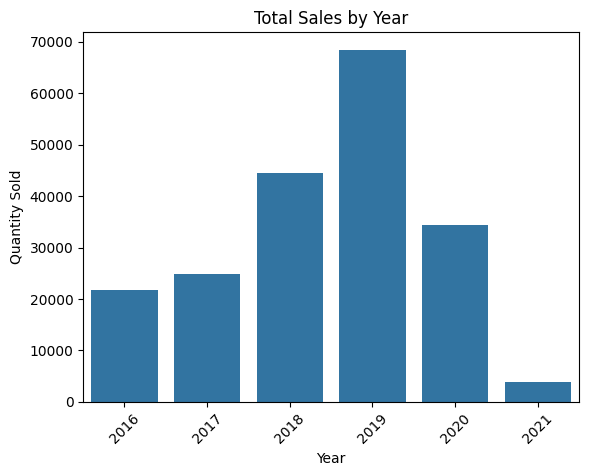

In [37]:
# @title Total Sales by Year
sns.barplot(sales_year,x='Year',y='Quantity')
plt.tick_params(axis='x', rotation=45)
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Quantity Sold')
plt.show()

* From 2016 - 2019 the sales follows a +ve increasing trend
* From 2019 - 2020 we can see a 50 % drop in sales which may be due to market trends, covid-19 pandemic
* In 2021 there is a significant decrease as we dont have the complete yearly data.We only have data for th emonth of January and February.

In [38]:
sales_year_month = sales.groupby(['Year','Month'])['Quantity'].sum().reset_index()
sales_year_month

,Year,Month,Quantity
0,2016,April,326
1,2016,August,1611
2,2016,December,3209
3,2016,February,2676
4,2016,January,2116
...,...,...,...
57,2020,November,1044
58,2020,October,1042
59,2020,September,1328
60,2021,February,1949


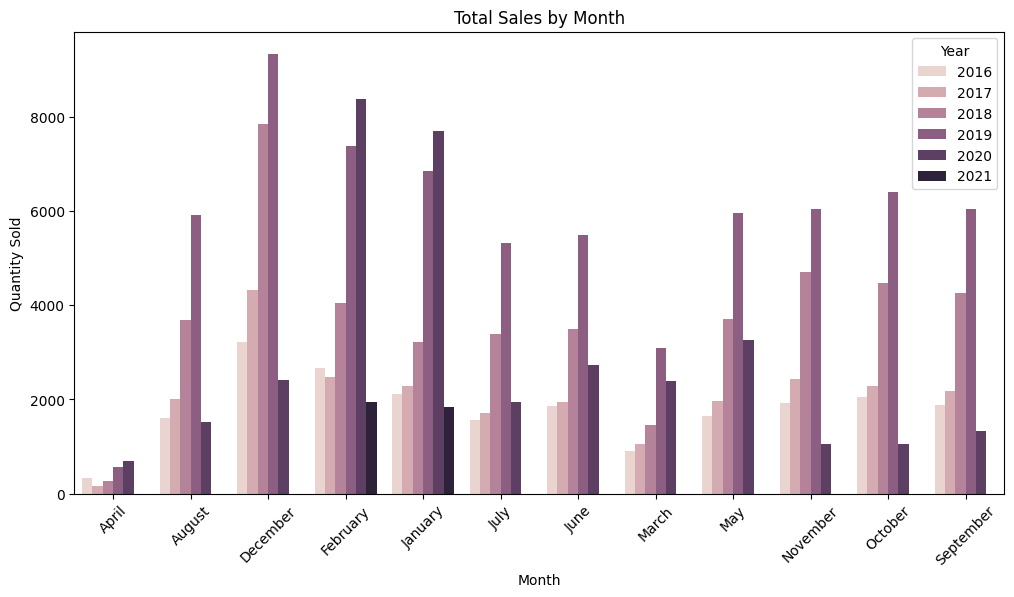

In [39]:
# @title Total Sales by Month
plt.figure(figsize=(12,6))
sns.barplot(sales_year_month,x='Month',y='Quantity',hue='Year')
plt.tick_params(axis='x', rotation=45)
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.show()

* The highest sales has happened in the month of december, the reason being holiday season.
* While observing the 5th bar in every month we can see that after 1st 2 months there is huge drop in sales  in 2020
* The least sales have happend in the month of April

In [40]:
sales['StoreKey'].value_counts().head()

StoreKey
0     13165
9      1577
50     1519
55     1518
54     1498
Name: count, dtype: int64

In [41]:
sales['Store_Type'] = np.where(sales['StoreKey'] == 0, 0, 1)

* Here we split of sales between online(0) and retail store(1)

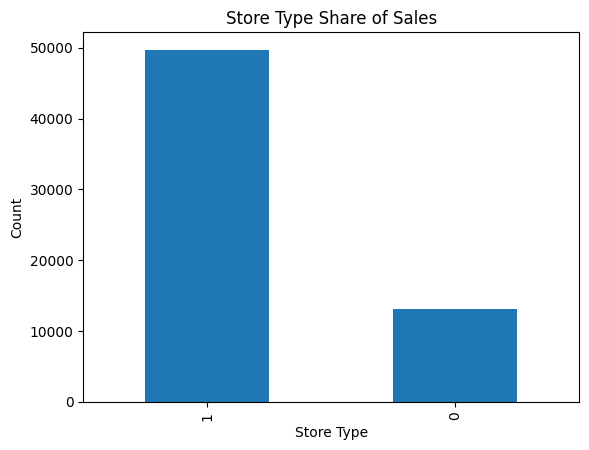

In [42]:
sales['Store_Type'].value_counts().plot(kind='bar')
plt.title('Store Type Share of Sales')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.show()

* We see that delivery dates are present for only the rows with store key 0
* Where as the other store keys doesnt have delivery dates so may be the other stores are retail stores where we can say  order date and delivery date are same.
* We can see that Sales in retail stores are significantly higher when compared to online .

In [43]:
sales['Delivery Date'].fillna(sales['Order Date'], inplace=True)

Assuming that the delivery was made the same day as ordered fo retail stores we are imputing the delivery date with order date

## Most Profitable Categories

Understanding the most profitable categories is essential for revenue optimization as it provides insights into which
product categories generate the highest sales revenue. This analysis enables businesses to focus resources, marketing
efforts, and inventory management strategies on high-performing categories, maximizing profitability and overall
business success.

In [44]:
df_merged = pd.merge(sales, products, on='ProductKey', how='left')

In [45]:
df_merged['Amount'] = df_merged['Unit Price USD'] * df_merged['Quantity']
total_amount_spent = df_merged.groupby('Order Number')['Amount'].sum().reset_index()
total_amount_spent.rename(columns={'Amount': 'Total'}, inplace=True)
total_amount_spent.head()


,Order Number,Total
0,366000,68.00
1,366001,1519.94
2,366002,5164.00
3,366004,10063.20
4,366005,1876.00


In [46]:
profitable_categories = df_merged.groupby('Category')['Amount'].sum().sort_values(ascending=False)
print("Most Profitable Categories:")
print(profitable_categories)

Most Profitable Categories:
Category
Computers                        19301595.46
Home Appliances                  10795478.59
Cameras and camcorders            6520168.02
Cell phones                       6183791.22
TV and Video                      5928982.69
Audio                             3169627.74
Music, Movies and Audio Books     3131006.44
Games and Toys                     724829.43
Name: Amount, dtype: float64


**Insights**:
1. Computers is the most profitable category, generating the highest total revenue among all categories.
2. Home Appliances and Cameras and camcorders follow Computers as the next most profitable categories.
3. Cell phones and TV and Video also contribute significantly to the total revenue.
4. Audio and Music, Movies and Audio Books contribute less compared to the top categories but still make substantial
revenue.
5. Games and Toys generate the least revenue among the listed categories, indicating they might be less popular or
have lower-priced products compared to other categories.

In [47]:
# @title Top 10 Most Sold Products
product_sales = df_merged.groupby('Product Name Without Color')['Quantity'].sum()

print("Top 10 Most Sold Products:")
print(product_sales.nlargest(10))

Top 10 Most Sold Products:
Product Name Without Color
WWI Desktop PC1.60 E1600                1945
Adventure Works Desktop PC2.30 MD230    1920
Adventure Works Desktop PC1.60 ED160    1911
Adventure Works Desktop PC1.80 ED180    1879
Adventure Works Desktop PC2.33 XD233    1873
WWI Desktop PC2.33 X2330                1864
WWI Desktop PC1.80 E1801                1757
WWI Desktop PC2.30 M2300                1748
WWI Desktop PC1.80 E1800                1743
Adventure Works Desktop PC1.80 ED182    1708
Name: Quantity, dtype: int64


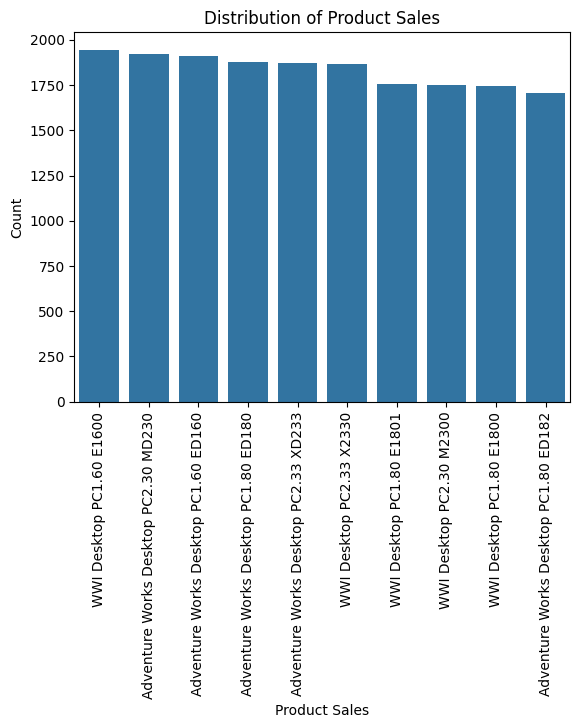

In [48]:
top_10 = product_sales.nlargest(10)
sns.barplot(top_10)
plt.title('Distribution of Product Sales')
plt.xticks(rotation=90)
plt.xlabel('Product Sales')
plt.ylabel('Count')
plt.show()

* We see that the top 10 sold products are computers in particularly of WWI and Adventure works brand
* These findings underscore the robust demand and appeal of these products, indicating their pivotal role in
driving revenue for the business.


In [49]:
average_order_size = sales.groupby('Order Number')['Quantity'].mean().mean()

print("Average Order Size:", average_order_size)

Average Order Size: 3.1477266725272495


The average order size of customers is 3.15 indicating a relatively lower order quantity per transaction

Possible Reasons

* **Shopping Behaviour**: Customers might prefer to make frequent, smaller purchases rather than buying in bulk.
* **Product Types**: The types of products sold could also influence the average order size. For instance, if the store
specializes in high-value items, customers may be inclined to buy fewer items per order.

In [50]:
# @title Time Between Purchases
sales['Time Between Purchases'] = sales.groupby('CustomerKey')['Order Date'].diff().dt.days

time_between_purchases = sales['Time Between Purchases'].dropna()

print("Average Time Between Purchases:", time_between_purchases.mean())

Average Time Between Purchases: 99.23987685550131


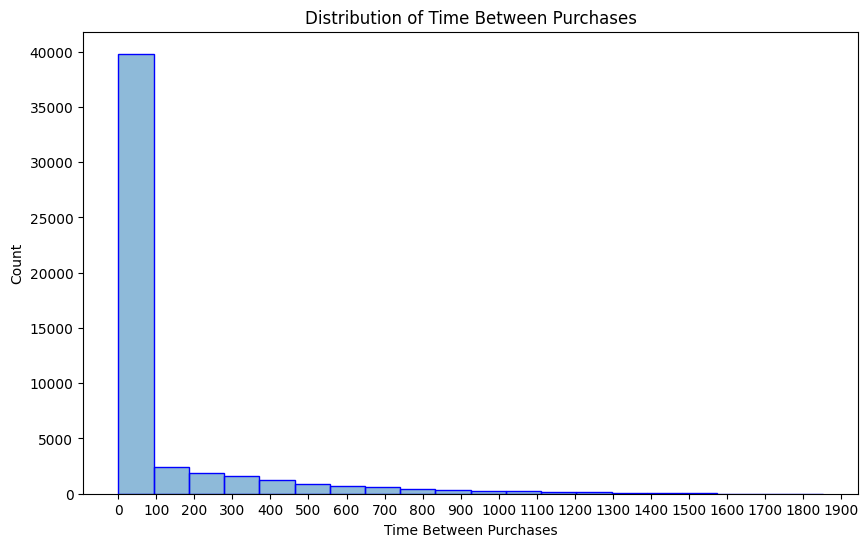

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(time_between_purchases, bins=20, edgecolor='b', alpha=0.5)
plt.title('Distribution of Time Between Purchases')
plt.xticks(ticks=np.arange(0, 2000, step=100))
plt.xlabel('Time Between Purchases')
plt.ylabel('Count')
plt.show()

* From the Histogram we can see that the average time between purchases is about 100 days , which is pretty big
* From 0-100,100-200 there is peak pattern suggests frequent repeat
purchases or recurring buying behaviour among a considerable portion of customers.
* The longer tail of the histogram represents infrequent or irregular buying by the customers.

### Merging by total sales

In [52]:
total_purchases = sales.groupby('CustomerKey')['Quantity'].sum().reset_index()
customers = pd.merge(customers, total_purchases, on='CustomerKey',
how='left')

## RFM Feature

We aim to categorize customers using the RFM Model, so we need to compute the total amount spent by each customer, along with how recently they made purchases and how often they buy products.

In [53]:
%pip install rfm

In [54]:
customers.dropna()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,Age,Quantity
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939,85.0,2.0
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979,45.0,27.0
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947,77.0,14.0
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965,59.0,6.0
8,1314,Male,Isaac Israel,EDITH RIVER,NT,Northern Territory,852,Australia,Australia,12/21/1965,59.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15259,2099383,Female,Yseult Lacharité,Indianapolis,IN,Indiana,46268,United States,North America,2/24/2000,24.0,23.0
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,3/25/1936,88.0,10.0
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11/9/1937,87.0,9.0
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10/12/1937,87.0,3.0


In [55]:
df_merged.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Year,...,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Product Name Without Color,Amount
0,366000,1,2016-01-01,2016-01-01,265598,10,1304,1,CAD,2016,...,Contoso,White,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,Contoso Lens Adapter M450,68.00
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,2016,...,A. Datum,Silver,141.47,427.00,402,Digital SLR Cameras,4,Cameras and camcorders,A. Datum SLR Camera X136,854.00
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,2016,...,Fabrikam,Black,220.64,665.94,803,Microwaves,8,Home Appliances,Fabrikam Microwave 1.5CuFt X1100,665.94
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,2016,...,Contoso,Orange,148.08,322.00,402,Digital SLR Cameras,4,Cameras and camcorders,Contoso SLR Camera M146,2254.00
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,2016,...,Adventure Works,White,166.20,326.00,301,Laptops,3,Computers,Adventure Works Laptop8.9 E0890,326.00


In [56]:
from rfm import RFM
r = RFM(df_merged, 'CustomerKey', 'Order Date', 'Amount')

In [57]:
r.segment_table

,segment,no of customers
0,Champions,2016
1,Loyal Accounts,2251
2,Low Spenders,1295
3,Potential Loyalist,945
4,Promising,322
5,New Active Accounts,229
6,Need Attention,153
7,About to Sleep,1018
8,At Risk,2046
9,Lost,1612


In [58]:
%pip install squarify
import squarify



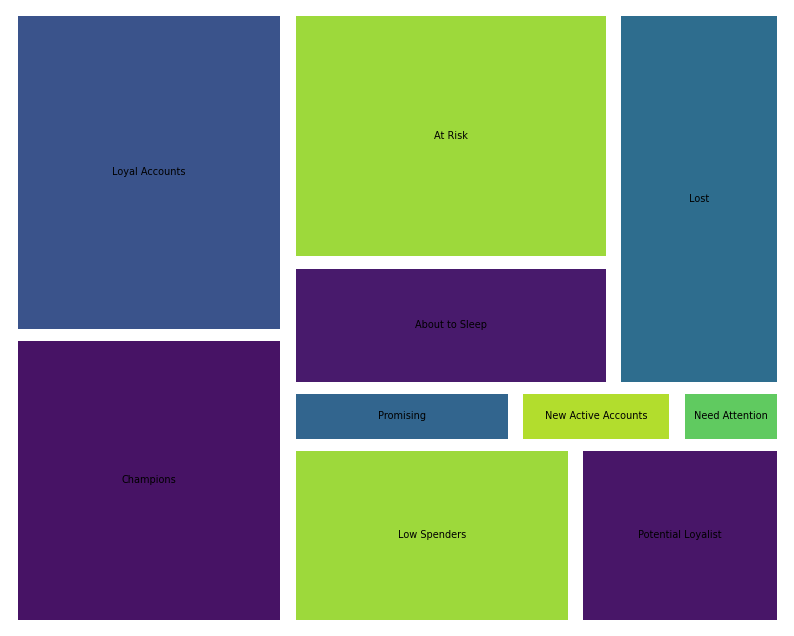

In [59]:
plt.figure(figsize=(10, 8))
squarify.plot(r.segment_table['no of customers'],label=r.segment_table['segment'],pad=1,
                     text_kwargs={'fontsize': 7})
plt.axis('off')
plt.show()

**Champions & Loyal Customers** : These 2 categories have almost equal amount of customers who exhibit frequent and moderate to high value purchases. Marketing strategies to these customers personal recommendations , exclusive discounts.

**Low Spenders , Potential Loyalists & Promising** : These categories account for about 2500 customers who do purchases in a bit infrequent manner. For them the marketing can be a little bit less aggressive.

**Need Attention & About to sleep** : These are the customers (1200) who are relatively in the middle of the RF graph. These are the most challenging groups to cater any offers and promotions. Re- engagement efforts can be made by sending surveys and offering recommendations/discounts based on the feedback


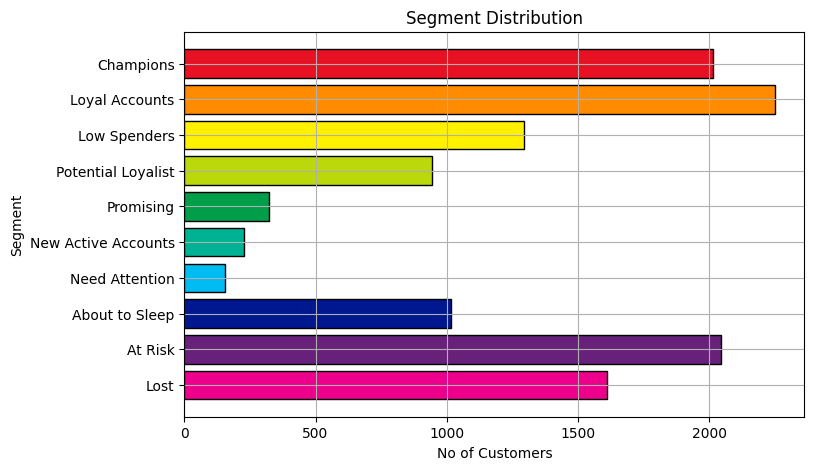

In [60]:
r.plot_segment_distribution()

In [61]:
r.rfm_table

,CustomerKey,recency,frequency,monetary_value,r,f,m,rfm_score,segment
0,2090406,172,9,13572.34,5,5,5,555,Champions
1,1978029,289,16,24982.14,5,5,5,555,Champions
2,1981433,6,11,8313.91,5,5,5,555,Champions
3,1981992,9,12,14629.00,5,5,5,555,Champions
4,725672,287,15,9393.70,5,5,5,555,Champions
...,...,...,...,...,...,...,...,...,...
11882,373815,1200,1,458.00,1,1,1,111,Lost
11883,374242,982,1,71.96,1,1,1,111,Lost
11884,750139,1355,1,518.00,1,1,1,111,Lost
11885,1150993,1806,2,527.66,1,1,1,111,Lost


In [88]:
wer = r.rfm_table
wer['CustomerKey']=wer['CustomerKey'].astype(int)
wer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11887 entries, 0 to 11886
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerKey     11887 non-null  int64  
 1   recency         11887 non-null  int64  
 2   frequency       11887 non-null  int64  
 3   monetary_value  11887 non-null  float64
 4   r               11887 non-null  int64  
 5   f               11887 non-null  int64  
 6   m               11887 non-null  int64  
 7   rfm_score       11887 non-null  object 
 8   segment         11887 non-null  object 
dtypes: float64(1), int64(6), object(2)
memory usage: 835.9+ KB


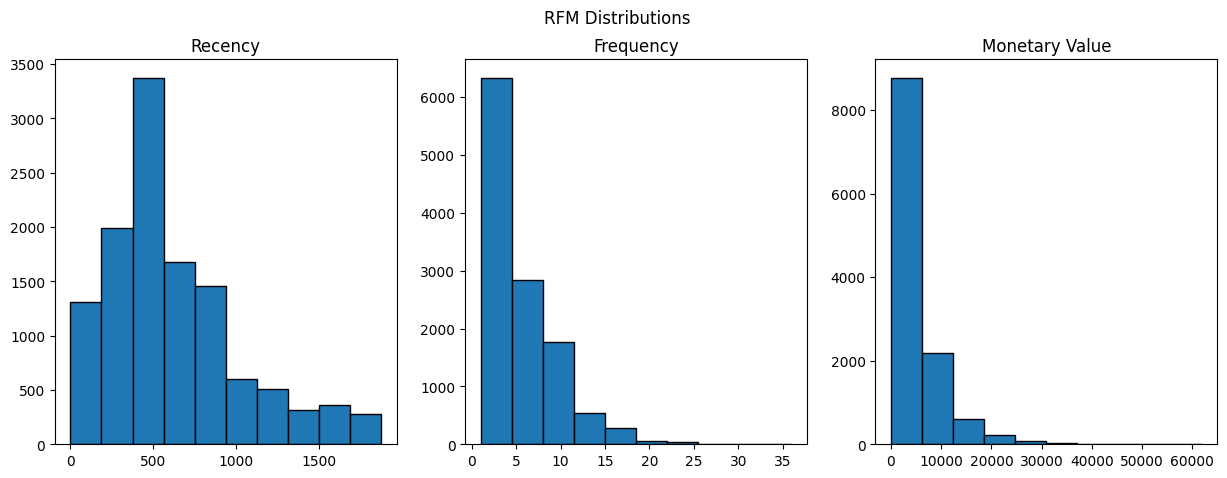

In [62]:
r.plot_rfm_histograms()

## Product Diversity

Lets have a look at the product diversity of the customers

In [63]:
unique_products_purchased = df_merged.groupby('CustomerKey')['ProductKey'].nunique().reset_index()
unique_products_purchased.rename(columns={'ProductKey': 'Unique_Products_Purchased'}, inplace=True)
unique_products_purchased.head()

,CustomerKey,Unique_Products_Purchased
0,301,1
1,325,10
2,554,4
3,1042,3
4,1314,5


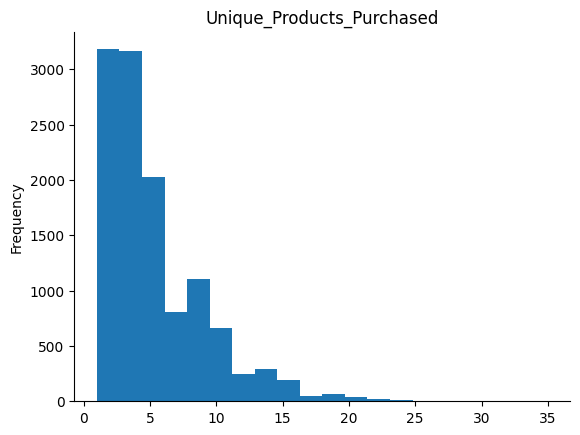

In [64]:
# @title Unique_Products_Purchased

from matplotlib import pyplot as plt
unique_products_purchased['Unique_Products_Purchased'].plot(kind='hist', bins=20, title='Unique_Products_Purchased')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Behavioural Features

Lets try to Understand the Behavioural features of the customers  

In [97]:
df_merged['Order day'] = df_merged['Order Date'].dt.date
df_merged['Day_Of_Week'] = df_merged['Order Date'].dt.strftime('%A')


days_between_purchases = df_merged.groupby('CustomerKey')['Order day'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerKey').mean().reset_index()
average_days_between_purchases.rename(columns={'Order day': 'Average_Days_Between_Purchases'}, inplace=True)
average_days_between_purchases['Average_Days_Between_Purchases']=round(average_days_between_purchases['Average_Days_Between_Purchases'],0)
average_days_between_purchases.head()

,CustomerKey,Average_Days_Between_Purchases
0,325,80.0
1,554,233.0
2,1042,0.0
3,1314,0.0
4,1568,51.0


In [98]:
favorite_shopping_day = df_merged.groupby(['CustomerKey', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerKey')['Count'].idxmax()][['CustomerKey', 'Day_Of_Week']]
favorite_shopping_day.rename(columns={'Day_Of_Week': 'Shopping_Day'}, inplace=True)
favorite_shopping_day.head()

,CustomerKey,Shopping_Day
0,301,Monday
1,325,Saturday
2,554,Thursday
3,1042,Tuesday
4,1314,Tuesday


In [99]:
monetary_table = pd.merge(df_merged, average_days_between_purchases, on='CustomerKey')
monetary_table = pd.merge(monetary_table, favorite_shopping_day, on='CustomerKey')
monetary_table.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Year,...,SubcategoryKey,Subcategory,CategoryKey,Category,Product Name Without Color,Amount,Order day,Day_Of_Week,Average_Days_Between_Purchases,Shopping_Day
0,366000,1,2016-01-01,2016-01-01,265598,10,1304,1,CAD,2016,...,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,Contoso Lens Adapter M450,68,2016-01-01,Friday,198.0,Friday
1,891000,1,2017-06-09,2017-06-09,265598,9,385,2,CAD,2017,...,301,Laptops,3,Computers,Adventure Works Laptop8.9 E0890,652,2017-06-09,Friday,198.0,Friday
2,891000,2,2017-06-09,2017-06-09,265598,9,174,1,CAD,2017,...,202,VCD & DVD,2,TV and Video,SV 22xDVD M600,129.9,2017-06-09,Friday,198.0,Friday
3,891000,3,2017-06-09,2017-06-09,265598,9,685,1,CAD,2017,...,306,"Printers, Scanners & Fax",3,Computers,"Proseware Desk Jet All-in-One Printer, Scanner...",158,2017-06-09,Friday,198.0,Friday
4,891000,4,2017-06-09,2017-06-09,265598,9,87,1,CAD,2017,...,106,Bluetooth Headphones,1,Audio,NT Wireless Bluetooth Stereo Headphones M402,99.99,2017-06-09,Friday,198.0,Friday


In [100]:
monetary_table = pd.merge(monetary_table, wer ,on='CustomerKey')

In [101]:
monetary_table["Shopping_Day"].value_counts()

Shopping_Day
Saturday     15779
Thursday     11640
Friday        9437
Wednesday     9333
Tuesday       7632
Monday        6479
Sunday        1009
Name: count, dtype: int64

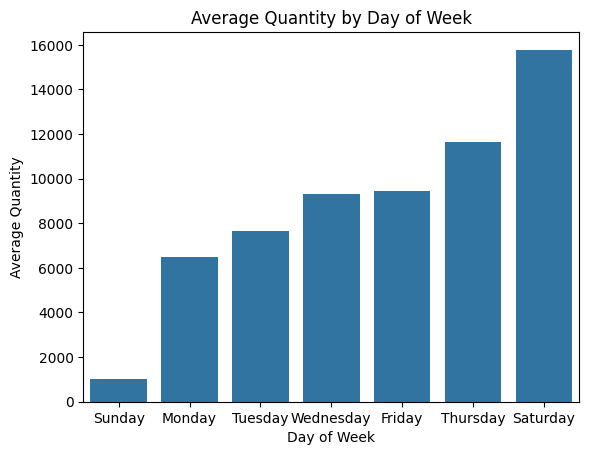

In [102]:
# @title Average Quantity by Day of Week

grouped_data = monetary_table.groupby('Shopping_Day')['Quantity'].count().sort_values().reset_index()
sns.barplot(x='Shopping_Day',y='Quantity', data=grouped_data)
plt.title('Average Quantity by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Quantity')
plt.show()

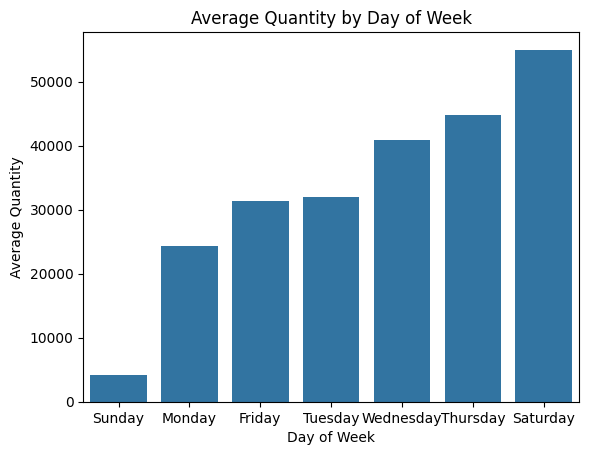

,Day_Of_Week,m
0,Sunday,4155
1,Monday,24310
2,Friday,31352
3,Tuesday,31920
4,Wednesday,40943
5,Thursday,44794
6,Saturday,55007


In [111]:
g_data = monetary_table.groupby('Day_Of_Week')['m'].sum().sort_values().reset_index()
sns.barplot(x='Day_Of_Week',y='m', data=g_data)
plt.title('Average Quantity by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Quantity')
plt.show()
g_data

**Inference** :
* The highest number products are sold on Saturdays.
* The highest spending occurs on Saturdays as well.

## Hypothesis Testing

### Age and Purchase Behaviour

**Ho**: There is no significant difference in purchase behaviour between different age groups

**Ha**: There is significant difference in purchase behaviour between different age groups

In [68]:
from scipy.stats import f_oneway

# Counting the number of orders for each customer
purchase_count = sales.groupby('CustomerKey')['Order Number'].count()

# Merging purchase count data with Customers_df
customers = pd.merge(customers, purchase_count, on='CustomerKey',
how='left')
customers.rename(columns={'Order Number': 'PurchaseCount'}, inplace=True)

# Defining the age groups
age_groups = customers['Age'].apply(lambda x: '18-30' if 18 <= x <= 30 else ('31-45' if 31 <= x <= 45 else '46+'))

# Adding age groups to the Customers_df
customers['AgeGroup'] = age_groups

# Calculating purchase frequency for each age group
purchase_frequency_by_age = customers.groupby('AgeGroup')['PurchaseCount'].sum()

# Performing ANOVA test
f_statistic, p_value = f_oneway(customers[customers['AgeGroup'] == '18-30']['PurchaseCount'],
                                customers[customers['AgeGroup'] == '31-45']['PurchaseCount'],
                                customers[customers['AgeGroup'] == '46+']['PurchaseCount'])

# significance level
alpha = 0.05

# Checking the p-value
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in purchase frequency between different age groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in purchase frequency between different age groups.")

Fail to reject the null hypothesis. There is no significant difference in purchase frequency between different age groups.


### Gender and Purchase behaviour

**Ho** :There is no significant difference in purchase behaviour between genders

**Ha** :There is significant difference in purchase behaviour between genders

In [69]:
af = pd.merge(customers,df_merged, on='CustomerKey')
af

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,...,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Product Name Without Color,Amount,Order day,Day_Of_Week
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939,...,98.,296,104,Recording Pen,1,Audio,WWI 4GB Video Recording Pen X200,592,2019-11-11,Monday
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979,...,160.49,349,303,Desktops,3,Computers,WWI Desktop PC3.0 M03,1396,2018-01-13,Saturday
2,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979,...,72.66,158,306,"Printers, Scanners & Fax",3,Computers,"Proseware Desk Jet All-in-One Printer, Scanner...",632,2018-01-13,Saturday
3,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979,...,214.,646,402,Digital SLR Cameras,4,Cameras and camcorders,Contoso SLR Camera X143,1938,2018-01-13,Saturday
4,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979,...,137.63,269.95,303,Desktops,3,Computers,Adventure Works Desktop PC1.60 ED160,809.8499999999999,2019-11-16,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2099937,Male,Zygmunt Kaminski,Bloomfield Township,MI,Michigan,48302,United States,North America,8/18/1965,...,188.13,369,303,Desktops,3,Computers,Adventure Works Desktop PC1.80 ED180,1845,2018-06-22,Friday
62880,2099937,Male,Zygmunt Kaminski,Bloomfield Township,MI,Michigan,48302,United States,North America,8/18/1965,...,186.6,366,301,Laptops,3,Computers,Fabrikam Laptop12 M2000,2562,2018-06-22,Friday
62881,2099937,Male,Zygmunt Kaminski,Bloomfield Township,MI,Michigan,48302,United States,North America,8/18/1965,...,395.48,860,405,Camcorders,4,Cameras and camcorders,Fabrikam Business Videographer 1/3'' 8.5mm M380,860,2018-06-22,Friday
62882,2099937,Male,Zygmunt Kaminski,Bloomfield Township,MI,Michigan,48302,United States,North America,8/18/1965,...,275.46,599,303,Desktops,3,Computers,Adventure Works Desktop PC2.30 MD230,5990,2020-02-15,Saturday


In [70]:
from scipy.stats import ttest_ind

male_purchase = af[af['Gender'] == 'Male']['Amount'].astype(float)
female_purchase = af[af['Gender'] == 'Female']['Amount'].astype(float)

# print(male_purchase)
# print(female_purchase)
# Performing t-test to compare means
t_statistic, p_value = ttest_ind(male_purchase, female_purchase)

print("\nT-Statistic:", t_statistic)
print("P-Value:", p_value)

# Statistical significance
alpha = 0.05
if p_value < alpha:
    print("The difference in purchase behaviour between genders is statistically significant.")
else:
    print("There is no statistically significant difference in purchase behaviour between genders.")


T-Statistic: 0.6587551284884556
P-Value: 0.5100554378399709
There is no statistically significant difference in purchase behaviour between genders.


##Loyalty metrics

In [112]:
# Calculating the total number of customers at the start and end
total_customers_end = len(sales['CustomerKey'].unique())
total_customers_beginning = len(customers['CustomerKey'].unique())

# Calculating the number of new customers acquired during the period
new_customers_acquired = total_customers_end - total_customers_beginning

# Calculating retention rate
retention_rate = ((total_customers_end - new_customers_acquired) /
total_customers_beginning) * 100

# Calculating repeat purchase rate
repeat_purchase_rate = (total_customers_end / total_customers_beginning) * 100

print("Retention Rate for the Entire Customer Base: {:.2f}%".format(retention_rate))
print("Repeat Purchase Rate for the Entire Customer Base: {:.2f}%".format(repeat_purchase_rate))

Retention Rate for the Entire Customer Base: 100.00%
Repeat Purchase Rate for the Entire Customer Base: 77.87%


# Recommendations

* The Sales dip could be attributed to less number of order by the repeat customers.
* Need To Implement strategies to increase engagement with existing customers, such as loyalty programs, personalized offers, or targeted promotions for the potentially loyal customers based on spending patterns.
* Given that Saturdays and Thursdays see the highest spending, concentrate promotional activities or new product launches on these days to maximize revenue.
* Since computers and cell phones are top-selling categories, consider expanding product offerings within these categories or introducing related accessories to capitalize on existing customer preferences.
* Develop marketing campaigns specifically tailored to attract new customers, focusing on cities or demographics where there's lower representation compared to North America and Europe.
* Create specific ads featuring products in black, silver, or white colors to attract customers.
* Provide resources, guides, or product demo videos to enhance customer knowledge and confidence in purchasing

